## K-Nearest Neighbor

K-Nearest-Neighbors (K-NN) is a supervised machine learning model. 
It works by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points.

- It classifies a data point based on how its neighbors are classified
- Stores all available cases and classifies new cases based on a similarity measure

**How it works:**
1. Compute a distance value between the item to be classified and every item in the training data-set
2. Pick the k closest data points (the items with the k lowest distances)
3. Conduct a “majority vote” among those data points — the dominating classification in that pool is decided as the final classification

To find the nearest neighbors, it calculates ***Euclidean distance***.

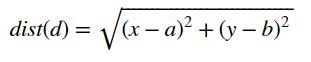
It is essentially the magnitude of the vector obtained by subtracting the training data point from the point to be classified.
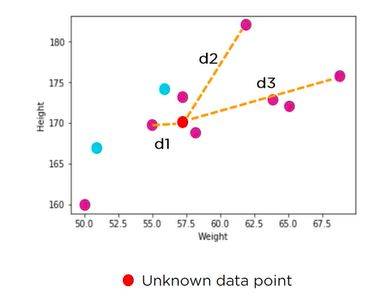

***Great sources:***
- https://towardsdatascience.com/introduction-to-k-nearest-neighbors-3b534bb11d26
- https://scikit-learn.org/stable/modules/neighbors.html
- https://www.youtube.com/watch?v=4HKqjENq9OU&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=20

### Example: Diabetes Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check number of rows and columns in dataset
data.shape

(768, 9)

Values of columns like "Glucose", "BloodPressure" cannot be accepted as zeros because it will affect the outcome

We can replace such variables with the mean of the respective column:

In [4]:
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]

In [5]:
for column in zero_not_accepted:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Split up our dataset into inputs (X) and our target (y). Our input will be every column except ‘Outcome’ because ‘Outcome’ is what we will be attempting to predict. Therefore, ‘Outcome’ will be our target.

In [7]:
X = data.iloc[:, 0:8] #all columns except 'Outcome'
y = data.iloc[:, 8] #column 'Outcome'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

**RULE OF THUMB**

Any algorithm that computes distance or assumes normality needs the data to be scaled:

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)  # isn't part of training, so we don't fit it

Choosing the right K value:

In [9]:
import math
math.sqrt(len(y_test))

12.409673645990857

12 is an even number, we need to make it odd so it will be 11.

p = 2 because it can be diabetic or not

In [10]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
# Model evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [13]:
print(f1_score(y_test, y_pred))  # takes into account false positives

0.6956521739130436


In [14]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


### Example: Iris Clasification

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [16]:
df = pd.read_csv("data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Check number of rows and columns in dataset
df.shape

(150, 6)

In [18]:
X1 = df.iloc[:, 1:5] #all columns except 'Id and Species'
y1 = df.iloc[:, 5] #column 'Species'
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.2)

In [19]:
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)  # isn't part of training, so we don't fit it

In [20]:
import math
math.sqrt(len(y1_test))

5.477225575051661

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5, p=3, metric="euclidean")
classifier.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=3,
           weights='uniform')

In [22]:
y1_pred = classifier.predict(X1_test)

In [23]:
# Model evaluation
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [24]:
print(f1_score(y1_test, y1_pred, average = None))  # average=None for non-binary scores

[1. 1. 1.]


In [25]:
print(accuracy_score(y1_test, y1_pred))

1.0


It is 100% accurate!